# 1. How are coefficients affected? coeff vs alpha

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [17]:
data= load_diabetes()

In [22]:
df= pd.DataFrame(data.data, columns= data.feature_names)
df['target']= data.target

In [23]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [26]:
x= df.iloc[:,:10]
y=df['target']

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=3)

In [33]:
coefs=[]
r2_scores=[]
for i in [0,10,100,10000]:
    reg= Ridge(alpha=i)
    reg.fit(x_train, y_train)
    y_pred= reg.predict(x_test)
    coefs.append(reg.coef_.tolist())
    r2_scores.append(r2_score(y_test, y_pred))

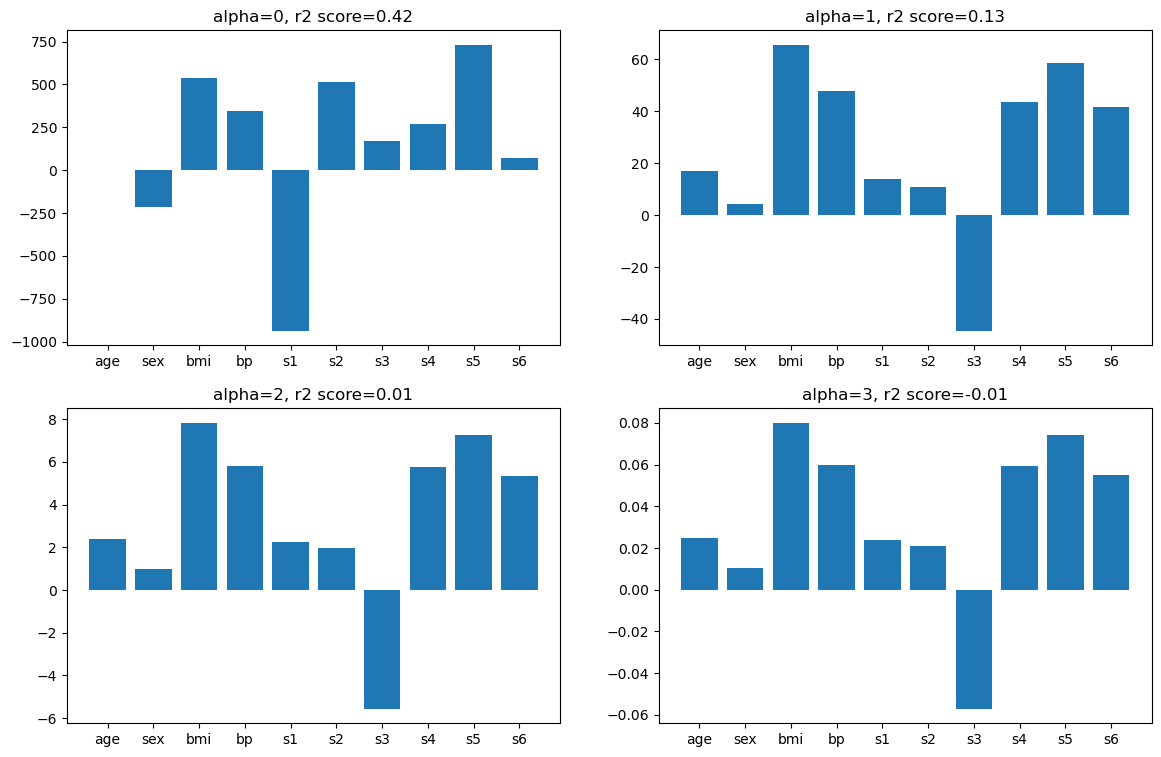

In [38]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('alpha=0, r2 score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('alpha=1, r2 score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('alpha=2, r2 score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('alpha=3, r2 score={}'.format(round(r2_scores[3],2)))
          
          
plt.show()

# 2. Higher coeffs are affected more

In [39]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs=[]
for i in alphas:
    reg= Ridge(alpha=i)
    reg.fit(x_train, y_train)
    coefs.append(reg.coef_.tolist())
    

In [40]:
coefs_arr= np.array(coefs)

In [42]:
coefs_df= pd.DataFrame(coefs_arr, columns= data.feature_names)
coefs_df['alpha']= alphas
coefs_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-1.137447,-212.886784,540.455370,345.206215,-938.238146,516.620604,172.858855,267.875352,732.632302,70.078495
0.0001,-1.070077,-212.814672,540.485322,345.151508,-926.008223,506.892257,167.342827,266.372602,728.045546,70.150064
0.0010,-0.532612,-212.200284,540.655557,344.681923,-829.681567,430.344490,123.884841,254.485126,691.885745,70.748076
0.0100,2.034846,-207.498280,538.362968,340.951879,-426.587300,113.339066,-58.334841,202.680394,538.983343,74.794045
0.1000,8.843317,-174.455600,495.123556,314.113959,-114.145916,-94.801104,-193.457671,150.492504,395.190984,95.978619
1.0000,31.099871,-49.671992,287.470224,193.255588,-8.986353,-30.030837,-156.972619,121.336081,229.519706,119.701110
10.0000,17.122235,4.328519,65.711492,47.910488,13.924461,10.951702,-44.642002,43.718335,58.735554,41.480839
100.0000,2.368040,0.977748,7.834705,5.821637,2.234969,1.945590,-5.565810,5.751560,7.239589,5.326862
1000.0000,0.245634,0.105244,0.799706,0.595513,0.235170,0.206406,-0.570956,0.593589,0.741859,0.548179


In [44]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [45]:
coefs_arr = np.array(coefs).T

In [49]:
coefs_arr.shape

(10, 10)

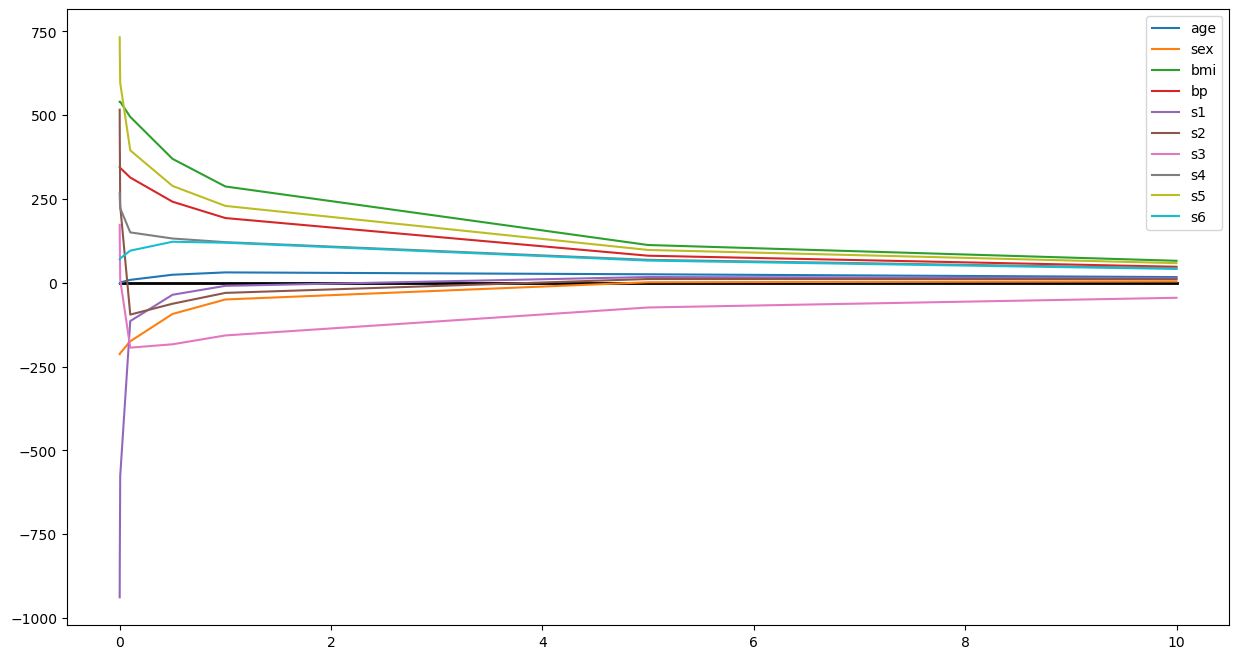

In [50]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=2)
for i in range(coefs_arr.shape[0]):
    plt.plot(alphas,coefs_arr[i],label=data.feature_names[i])
plt.legend()
plt.show()